## 1- Prerequisite and setting up the environment.

Data Folder:
Data/tweet.txt
Data/tweet_x.csv

Libraries:
sklearn
scipy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from Definations import *
from Utilities import *
from sklearn.feature_selection.univariate_selection import SelectPercentile
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.manifold import isomap
import numpy as np
from scipy.sparse import hstack

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

# First Stage

## Dataset Exploration

##  Benchmark Experiment Replication using ASTD

1. It stands for Arabic Sentemental Tweet Dataset which is used for arabic social sentimental analysis .
2. Consist of 10000 tweets gathered from twitter.
3. Each tweet is Classified as: objective, subjective positive, subjective negative or subjective mixed.

#### Loading the data set in jupyter for exploration.

### Text File

In [4]:
import codecs
filename = codecs.open('data\Tweets.txt', 'r', encoding="utf-8")
outputfile = filename.readlines()
for line in outputfile[0:5]:
    print(line)

بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان	OBJ

أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته	POS

البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف	NEG

#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة	OBJ

الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان	NEUTRAL



### CSV File

In [5]:
df = pd.read_csv('data\Tweets_x.csv', delimiter='\t',names= ["Tweet", "Classification"])

df.head()

,Tweet,Classification
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL


In [6]:
df.describe()

,Tweet,Classification
count,10006,9986
unique,10002,4
top,يوسف الحسيني بالفيديو يفضح كذب قناة الجزيرة وي...,OBJ
freq,2,6675


AS it can be clearly seen, I lost some data in this process since i converted the txt into csv using excel. I removed them to keep dataset consistant but I will fix this issue later

## Show Count of All Categories

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Tweet,Classification
count,9986,9986
unique,9982,4
top,الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء ال...,OBJ
freq,2,6675


OBJ        6675
NEG        1682
NEUTRAL     831
POS         798
Name: Classification, dtype: int64


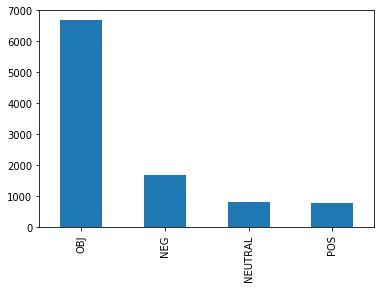

In [9]:
s2 = df.Classification
print(s2.value_counts())
# s2.value_counts().plot(kind='hist') 
s2.value_counts().plot( kind="bar") 
plt.show()

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# y = np.random.rand(10,4)
# y[:,0]= np.arange(10)
# df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

# ax = df.plot(x="X", y="A", kind="bar")
# df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
# df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

# plt.show()

## Benchmark Model

Experments conducted is about applying wide range of standard classifiers on balanced and unbalanced data using token count with/without Tf-Idf to preprocess the dataset.

These Classifiers are:
    - Logistic Regression
    - Passive Aggresive
    - SVM
    - Perceptron
    - bnb
    - mnb
    - sgd
    - KNN

### ASTD paper Experiment Replication

#### String Token Count:

It takes each sentence (all the words) present in the data set in the review section and then splits each of the words present in the form of tokens. The occurrence of these tokens in the whole data set are counted in such a way that the count of the occurrence of each token in a positive and negative feedback (in balanced dataset) or positive, negative and neutral (in unbalanced dataset) are collected separately. Finally, the word frequency of the tokens is calculated.
Tokens count is calculated by LinkedHashMap method. 


Tools: LinkedHashMap is it contains only the unique elements implemented using JAVA or OrderedDict in Python

code:  https://stackoverflow.com/questions/653887/equivalent-for-linkedhashmap-in-python

Ref: https://acadpubl.eu/hub/2018-119-12/articles/5/1211.pdf

#### Frequency–inverse document frequency(Tfidf):


It measures how important a word is to differentiate each category. It reduce the weightage of more common words like (stop words or common words) which occurs in all tweets. 

Code: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd 

Ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.121.1424&rep=rep1&type=pdf 

In [11]:
#this function to retrive sentimental count in each class
def GetCount(array):
    df = pd.DataFrame(array,columns= ["Class"])
    counts = df.Class.value_counts()
    OBJ = counts['OBJ']
    NEG = counts['NEG']
    NEUTRAL = counts['NEUTRAL']
    POS = counts['POS']
    return [OBJ, NEG, NEUTRAL ,POS]

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 14 19:05:12 2013

@author1: Mohamed Aly <mohamed@mohamedaly.info>
@author2: Mahmoud Nabil <mah.nabil@yahoo.com>


moved to jupyter notebook and edited by Rabab Alkhalifa <raalkhalifa@iau.edu.sa>
"""


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
TweetCount_collection = {}


FeatuerDataSet = []
for data in datas:
    scores = list()
    
    ###################################load the data####################################
    print("\n" +"="*40)
    print("Loading data:", data['name'])
    print("\n" +"="*40)
    if (LoadValidation):
        (d_train, y_train, d_test, y_test, d_valid, y_valid) = gr.get_train_test_validation(**data['params'])
        if (Evaluate_On_TestSet):
            d_train = np.concatenate((d_train, d_valid))
            y_train = np.concatenate((y_train, y_valid))
        else:
            d_test = d_valid
            y_test = y_valid
    else:
        (d_train, y_train, d_test, y_test) = gr.get_train_test(**data['params'])
    

#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_train) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_test) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_valid) 
    #---------------------------------------------------------------------------------
    TweetCount = [GetCount(y_train ), GetCount(y_test), GetCount(y_valid) ]
    df_tweetCount = pd.DataFrame(TweetCount,columns= ['OBJ', 'NEG', 'NEUTRAL' ,'POS']) 
    df_tweetCount['Dataset'] = ['Train Set','Test Set','Validation Set']
    df_tweetCount['name'] = data['name']
    TweetCount_collection[data['name']] = df_tweetCount
    #---------------------------------------------------------------------------------
    ####################################################################################
    
    for feat_generator in Features_Generators:
        ####################################Features Generation#############################
#         print("Features Generation:", feat_generator['name'])
        X_train = feat_generator['feat_generator'].fit_transform(d_train)
        X_test = feat_generator['feat_generator'].transform(d_test)
        ####################################################################################
        
        
        FeatuerData = [data['name'], feat_generator['name'],X_train.shape[1]]
        FeatuerDataSet.append(FeatuerData)
        for clf in classifiers:

                    if clf['parameter_tunning']:
                        # region parameter tunning
#                         print("tuning: ", clf["name"])
                        clf['tune_clf'].fit(X_train, y_train)
#                         print (data['name'])
#                         print (feat_generator['name'])
#                         print (clf['tune_clf'].best_estimator_)
                        # endregion
                    else:
                        ####################################Training And Predict################################
                        pred = Train_And_Predict(X_train, y_train, X_test, clf['clf'], clf["name"])

                        (acc, tacc, support, f1 , df) = Evaluate_Result(pred, y_test)

                        score = dict(data=data['name'],
                                         feat_generator=feat_generator['name'],
                                         clf=clf['name'],
                                         # feat_ext=feat_ext['name'],
                                         f1=f1,
                                         acc=acc,
                                         tacc=tacc)
                        
                        df['Classifier'] =  clf["name"]
                        df['feauter_generator'] = feat_generator['name']
                        
                        
                        
                        
                        dataframe_collection[ data['name'] + '-' + clf["name"] + '-' + feat_generator['name'] ]  = df
#                         print(clf["name"],df['feauter_generator'] )
                        scores.append(score)

    for key in dataframe_collection.keys():
        print("\n" +"="*40)
        print(key)
        print("-"*40)
        print(dataframe_collection[key])

        df_Classifiers = pd.DataFrame(classifiers)
        classifiers_collection[data['name']] = df_Classifiers

    #     print("-"*40)
    #     print(df_Classifiers.head())

        df_s = pd.DataFrame(scores)
        scores_collection[data['name']] = df_s
    #     print("-"*40)
    #     print(df_s.head())
df_feauterCount = pd.DataFrame(FeatuerDataSet, columns=['DataSet_Name','Feauter_Generator','Feauters+Count'])
    
# ####################################Testing##############################################
# print(60 * "=")
# for s in scores:
#     print("")
#     for k, v in s.iteritems():
#         print(k, v)


('Loading data:', '4-balanced')



C:\Users\Home\Anaconda2\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\Home\Anaconda2\lib\site-packages\sklearn\naive_bayes.py:664: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\Home\Anaconda2\lib\site-packages\sklearn\feature_extraction\text.py:1015: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):



4-balanced-Perceptron-tfidf_ng3
----------------------------------------
     TP     FP    FN        L  Percision    Recall  Classifier  \
0  65.0   79.0  94.0      NEG   0.451389  0.408805  Perceptron   
1  65.0  100.0  94.0  NEUTRAL   0.393939  0.408805  Perceptron   
2  78.0   92.0  81.0      OBJ   0.458824  0.490566  Perceptron   
3  73.0   84.0  86.0      POS   0.464968  0.459119  Perceptron   

  feauter_generator  
0         tfidf_ng3  
1         tfidf_ng3  
2         tfidf_ng3  
3         tfidf_ng3  

4-balanced-Perceptron-tfidf_ng2
----------------------------------------
     TP     FP    FN        L  Percision    Recall  Classifier  \
0  71.0   92.0  88.0      NEG   0.435583  0.446541  Perceptron   
1  65.0  105.0  94.0  NEUTRAL   0.382353  0.408805  Perceptron   
2  75.0   80.0  84.0      OBJ   0.483871  0.471698  Perceptron   
3  73.0   75.0  86.0      POS   0.493243  0.459119  Perceptron   

  feauter_generator  
0         tfidf_ng2  
1         tfidf_ng2  
2         tfid

In [13]:
clf['tune_clf']

GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.1, 0.3, 0.6, 0.8, 0.0], 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
for key in dataframe_collection.keys():
        print("\n" +"="*40)
        print(key)
        print("-"*40)
        print(dataframe_collection[key])
        break


4-unbalanced-SVM-tfidf_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0   100.0  135.0  236.0      NEG   0.425532  0.297619        SVM   
1    11.0   49.0  155.0  NEUTRAL   0.183333  0.066265        SVM   
2  1202.0  446.0  136.0      OBJ   0.729369  0.898356        SVM   
3    29.0   27.0  130.0      POS   0.517857  0.182390        SVM   

  feauter_generator  
0         tfidf_ng1  
1         tfidf_ng1  
2         tfidf_ng1  
3         tfidf_ng1  


### Data Preperation Statistics

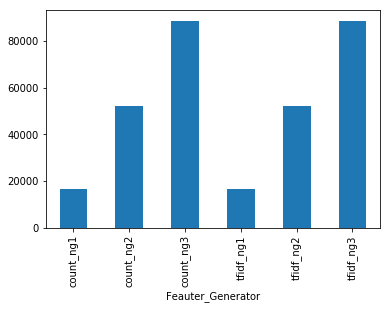

In [15]:
balanceFeauters = df_feauterCount[df_feauterCount['DataSet_Name'] == '4-balanced']
balanceFeauters.index = balanceFeauters.Feauter_Generator

balanceFeauters['Feauters+Count'].plot(kind='bar')
plt.show()

In [16]:
balanceFeauters

,DataSet_Name,Feauter_Generator,Feauters+Count
Feauter_Generator,,,
count_ng1,4-balanced,count_ng1,16457
count_ng2,4-balanced,count_ng2,52036
count_ng3,4-balanced,count_ng3,88672
tfidf_ng1,4-balanced,tfidf_ng1,16457
tfidf_ng2,4-balanced,tfidf_ng2,52036
tfidf_ng3,4-balanced,tfidf_ng3,88672


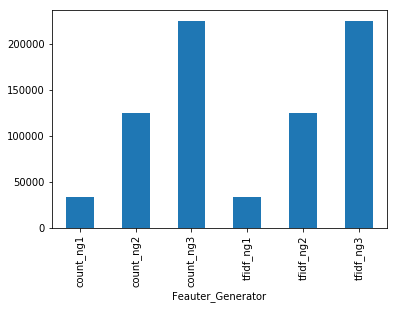

In [17]:
unbalanceFeauters = df_feauterCount[df_feauterCount['DataSet_Name'] == '4-unbalanced']
unbalanceFeauters.index = unbalanceFeauters.Feauter_Generator

unbalanceFeauters['Feauters+Count'].plot(kind='bar')
plt.show()

In [18]:
unbalanceFeauters

,DataSet_Name,Feauter_Generator,Feauters+Count
Feauter_Generator,,,
count_ng1,4-unbalanced,count_ng1,33365
count_ng2,4-unbalanced,count_ng2,124760
count_ng3,4-unbalanced,count_ng3,225111
tfidf_ng1,4-unbalanced,tfidf_ng1,33365
tfidf_ng2,4-unbalanced,tfidf_ng2,124760
tfidf_ng3,4-unbalanced,tfidf_ng3,225111


In [19]:
# df_feauterCount[df_feauterCount['Feauter_Generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
df_feauterCount[df_feauterCount['DataSet_Name'] == '4-unbalanced']

,DataSet_Name,Feauter_Generator,Feauters+Count
6,4-unbalanced,count_ng1,33365
7,4-unbalanced,count_ng2,124760
8,4-unbalanced,count_ng3,225111
9,4-unbalanced,tfidf_ng1,33365
10,4-unbalanced,tfidf_ng2,124760
11,4-unbalanced,tfidf_ng3,225111


In [20]:
TweetCount_collection['4-balanced']

,OBJ,NEG,NEUTRAL,POS,Dataset,name
0,640,640,640,640,Train Set,4-balanced
1,159,159,159,159,Test Set,4-balanced
2,159,159,159,159,Validation Set,4-balanced


In [21]:
TweetCount_collection['4-unbalanced']

,OBJ,NEG,NEUTRAL,POS,Dataset,name
0,5353,1348,666,640,Train Set,4-unbalanced
1,1338,336,166,159,Test Set,4-unbalanced
2,1338,336,166,159,Validation Set,4-unbalanced


## Benchmark model experiments settings

In [57]:
# for key in classifiers_collection.keys():
#     print("\n" +"="*40)
#     print(key)
#     print("-"*40)
#     print(classifiers_collection[key])

classifiers_collection['4-balanced']

KeyError: '4-balanced'

In [23]:
classifiers_collection['4-unbalanced']

,clf,name,parameter_tunning,tune_clf
0,"LogisticRegression(C=1.0, class_weight=None, d...",Logistic Regression,True,"GridSearchCV(cv=3, error_score='raise',\n ..."
1,"PassiveAggressiveClassifier(C=1.0, class_weigh...",Passive Aggresive,False,NaN
2,"LinearSVC(C=1.0, class_weight=None, dual=False...",SVM,False,NaN
3,"Perceptron(alpha=0.0001, class_weight=None, et...",Perceptron,False,NaN
4,"BernoulliNB(alpha=1.0, binarize=0.5, class_pri...",bnb,False,NaN
5,"SGDClassifier(alpha=0.0001, average=False, cla...",sgd,False,NaN
6,"KNeighborsClassifier(algorithm='auto', leaf_si...",KNN,False,"GridSearchCV(cv=5, error_score='raise',\n ..."
7,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForest,False,NaN
8,"DecisionTreeClassifier(class_weight=None, crit...",DecisionTree,False,NaN
9,"MultinomialNB(alpha=1.0, class_prior=None, fit...",mnb,True,"GridSearchCV(cv=None, error_score='raise',\n ..."


## Standard Classifiers Performance

In [24]:
# scores_collection['4-balanced']

### String Token Count Classification results and evaluation using accuracy and F1-measure in the Balanced and Un-Balanced datasets

In [25]:
balanced_scores = scores_collection['4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
0,0.427673,Passive Aggresive,4-balanced,0.424200,count_ng1,0.427673
1,0.430818,SVM,4-balanced,0.427266,count_ng1,0.430818
2,0.460692,Perceptron,4-balanced,0.458359,count_ng1,0.460692
3,0.466981,bnb,4-balanced,0.447112,count_ng1,0.466981
4,0.422956,sgd,4-balanced,0.416146,count_ng1,0.422956
5,0.287736,KNN,4-balanced,0.260986,count_ng1,0.287736
6,0.419811,RandomForest,4-balanced,0.414660,count_ng1,0.419811
7,0.371069,DecisionTree,4-balanced,0.370432,count_ng1,0.371069
8,0.455975,Passive Aggresive,4-balanced,0.454473,count_ng2,0.455975
9,0.441824,SVM,4-balanced,0.437427,count_ng2,0.441824


In [26]:
# for key in scores_collection.keys():
#     print("\n" +"="*40)
#     print(key)
#     print("-"*40)
#     print(scores_collection[key])
balanced_scores = scores_collection['4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['tfidf_ng1'])]
subsetDataFrame[subsetDataFrame['acc'] > .680]

,acc,clf,data,f1,feat_generator,tacc
28,0.682341,sgd,4-unbalanced,0.618474,tfidf_ng1,0.682341


In [27]:
# for key in scores_collection.keys():
#     print("\n" +"="*40)
#     print(key)
#     print("-"*40)
#     print(scores_collection[key])
balanced_scores = scores_collection['4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['count_ng1', 'count_ng2','count_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
0,0.648324,Passive Aggresive,4-unbalanced,0.618529,count_ng1,0.648324
1,0.651326,SVM,4-unbalanced,0.615437,count_ng1,0.651326
2,0.630815,Perceptron,4-unbalanced,0.610633,count_ng1,0.630815
3,0.669835,bnb,4-unbalanced,0.540016,count_ng1,0.669835
4,0.656828,sgd,4-unbalanced,0.611330,count_ng1,0.656828
5,0.652826,KNN,4-unbalanced,0.547775,count_ng1,0.652826
6,0.672836,RandomForest,4-unbalanced,0.552290,count_ng1,0.672836
7,0.619310,DecisionTree,4-unbalanced,0.586953,count_ng1,0.619310
8,0.678839,Passive Aggresive,4-unbalanced,0.626160,count_ng2,0.678839
9,0.683842,SVM,4-unbalanced,0.628132,count_ng2,0.683842


### Tf-Idf Classification results and evaluation using accuracy and F1-measure in the Balanced and Un-Balanced datasets

In [28]:
balanced_scores = scores_collection['4-balanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
24,0.446541,Passive Aggresive,4-balanced,0.446697,tfidf_ng1,0.446541
25,0.459119,SVM,4-balanced,0.459458,tfidf_ng1,0.459119
26,0.454403,Perceptron,4-balanced,0.455061,tfidf_ng1,0.454403
27,0.289308,bnb,4-balanced,0.184085,tfidf_ng1,0.289308
28,0.433962,sgd,4-balanced,0.432609,tfidf_ng1,0.433962
29,0.369497,KNN,4-balanced,0.368337,tfidf_ng1,0.369497
30,0.394654,RandomForest,4-balanced,0.389601,tfidf_ng1,0.394654
31,0.325472,DecisionTree,4-balanced,0.323472,tfidf_ng1,0.325472
32,0.460692,Passive Aggresive,4-balanced,0.461774,tfidf_ng2,0.460692
33,0.463836,SVM,4-balanced,0.463870,tfidf_ng2,0.463836


In [29]:
balanced_scores = scores_collection['4-unbalanced']
subsetDataFrame = balanced_scores[balanced_scores['feat_generator'].isin(['tfidf_ng1', 'tfidf_ng2','tfidf_ng3'])]
subsetDataFrame

,acc,clf,data,f1,feat_generator,tacc
24,0.640320,Passive Aggresive,4-unbalanced,0.615789,tfidf_ng1,0.640320
25,0.671336,SVM,4-unbalanced,0.627289,tfidf_ng1,0.671336
26,0.633317,Perceptron,4-unbalanced,0.608004,tfidf_ng1,0.633317
27,0.669335,bnb,4-unbalanced,0.536751,tfidf_ng1,0.669335
28,0.682341,sgd,4-unbalanced,0.618474,tfidf_ng1,0.682341
29,0.667334,KNN,4-unbalanced,0.607542,tfidf_ng1,0.667334
30,0.672836,RandomForest,4-unbalanced,0.554279,tfidf_ng1,0.672836
31,0.595298,DecisionTree,4-unbalanced,0.568070,tfidf_ng1,0.595298
32,0.670335,Passive Aggresive,4-unbalanced,0.637384,tfidf_ng2,0.670335
33,0.686843,SVM,4-unbalanced,0.634600,tfidf_ng2,0.686843


In [56]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 14 19:05:12 2013

@author1: Mohamed Aly <mohamed@mohamedaly.info>
@author2: Mahmoud Nabil <mah.nabil@yahoo.com>


moved to jupyter notebook and edited by Rabab Alkhalifa <raalkhalifa@iau.edu.sa>
"""


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
TweetCount_collection = {}


FeatuerDataSet = []
for data in datas:
    scores = list()
    
    ###################################load the data####################################
    print("\n" +"="*40)
    print("Loading data:", data['name'])
    print("\n" +"="*40)
    if (LoadValidation):
        (d_train, y_train, d_test, y_test, d_valid, y_valid) = gr.get_train_test_validation(**data['params'])
        if (Evaluate_On_TestSet):
            d_train = np.concatenate((d_train, d_valid))
            y_train = np.concatenate((y_train, y_valid))
        else:
            d_test = d_valid
            y_test = y_valid
    else:
        (d_train, y_train, d_test, y_test) = gr.get_train_test(**data['params'])
    

#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_train) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_test) 
#     OBJ, NEG, NEUTRAL ,POS = GetCount(y_valid) 
    #---------------------------------------------------------------------------------
    TweetCount = [GetCount(y_train ), GetCount(y_test), GetCount(y_valid) ]
    df_tweetCount = pd.DataFrame(TweetCount,columns= ['OBJ', 'NEG', 'NEUTRAL' ,'POS']) 
    df_tweetCount['Dataset'] = ['Train Set','Test Set','Validation Set']
    df_tweetCount['name'] = data['name']
    TweetCount_collection[data['name']] = df_tweetCount
    #---------------------------------------------------------------------------------
    ####################################################################################
    
    for feat_generator in Features_Generators:
        ####################################Features Generation#############################
        print("Features Generation:", feat_generator['name'])
        X_train = feat_generator['feat_generator'].fit_transform(d_train)
        X_test = feat_generator['feat_generator'].transform(d_test)
        ####################################################################################
        
        
        FeatuerData = [data['name'], feat_generator['name'],X_train.shape[1]]
        FeatuerDataSet.append(FeatuerData)
        
        clf = RandomForestClassifier( random_state=0)

        # TODO: Create the parameters list you wish to tune, using a dictionary if needed.
        # HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

        # Number of trees in random forest
        # n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
        # Number of features to consider at every split
        max_features = ['auto', 'sqrt']
        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
        max_depth.append(None)
        # Minimum number of samples required to split a node
        min_samples_split = [4, 8, 16 ,64]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [200,300,400,600 ]
        # Method of selecting samples for training each tree
        # bootstrap = [True, False]
        # Create the random grid
        parameters = {# 'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf}
        #               ,'bootstrap': bootstrap}

        #Ref. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

        # TODO: Make an fbeta_score scoring object using make_scorer()
        scorer = make_scorer(fbeta_score, beta=0.5 ,average='macro')

        # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
        grid_obj =  GridSearchCV(clf , parameters ,scoring=scorer)

        # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
        grid_fit = grid_obj.fit(X_train,y_train)

        # Get the estimator
        best_clf = grid_fit.best_estimator_

        print(best_clf)

        # Make predictions using the unoptimized and model
        predictions = (clf.fit(X_train, y_train)).predict(X_test)
        best_predictions = best_clf.predict(X_test)


        # Report the before-and-afterscores
        print("Unoptimized model\n------")
        print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='macro')))
        print("\nOptimized Model\n------")
        print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='macro')))


('Loading data:', '4-balanced')

('Features Generation:', 'count_ng1')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=200, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Unoptimized model
------
Accuracy score on testing data: 0.3931
F-score on testing data: 0.3878

Optimized Model
------
Final accuracy score on the testing data: 0.2500
Final F-score on the testing data: 0.0735
('Features Generation:', 'count_ng2')
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=200, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=Fa

In [85]:
clf = Perceptron()

In [86]:
clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'eta0': 1.0,
 'fit_intercept': True,
 'n_iter': 5,
 'n_jobs': 1,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [97]:
clf = Perceptron()

grid_obj =  GridSearchCV( Perceptron(), {'alpha': [1, .8 , .5 , .3, .1 , .01 , .001 , .0001 ], 
                                        'fit_intercept': [True,False],
                                        'n_iter': [5, 10 , 15],
                                        'random_state': [0],
                                        'penalty': ['l1','l2'],
                                        'shuffle': [True , False],
                                        'warm_start': [True,False],
                                        'eta0': [1.0 , .5 ]
                                } )

grid_fit = grid_obj.fit(X_train,y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='macro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='macro')))

Perceptron(alpha=0.0001, class_weight=None, eta0=0.5, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty='l2', random_state=0, shuffle=True,
      verbose=0, warm_start=True)
Unoptimized model
------
Accuracy score on testing data: 0.6343
F-score on testing data: 0.3854

Optimized Model
------
Final accuracy score on the testing data: 0.6433
Final F-score on the testing data: 0.3965


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
models = [
    LogisticRegression(random_state=0),
    PassiveAggressiveClassifier(random_state=0),
    LinearSVC(tol=1e-3, random_state=0),
    Perceptron(n_iter=100, random_state=0),
    BernoulliNB(binarize=0.5),
    SGDClassifier(loss="hinge", penalty="l2", random_state=0),
    KNeighborsClassifier(n_neighbors=5, metric='euclidean', random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeClassifier(),
    MultinomialNB()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.head()

C:\Users\Home\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.


,model_name,fold_idx,accuracy
0,LogisticRegression,0,0.668122
1,LogisticRegression,1,0.669164
2,LogisticRegression,2,0.668539
3,LogisticRegression,3,0.668125
4,LogisticRegression,4,0.669375


In [84]:
cv_df[cv_df['accuracy'] > .68]

,model_name,fold_idx,accuracy
6,LinearSVC,1,0.682272
7,LinearSVC,2,0.686642
9,LinearSVC,4,0.680625


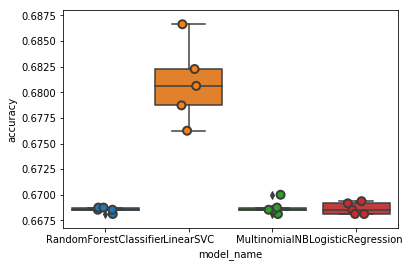

In [83]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [102]:
clf=SGDClassifier()

In [103]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'n_iter': 5,
 'n_jobs': 1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [ ]:
clf = SGDClassifier()

grid_obj =  GridSearchCV(clf , {'alpha': [1,.8,.6,.01,.001,0.0001],
                                 'average': [False,True],
                                 'epsilon': [.2,0.1,.05],
                                 'eta0': [0.0 , .5 , 1],
                                 'fit_intercept':[True, False],
                                 'l1_ratio': [0.15 , .30 , .60],
                                 'loss': ['hinge'],
                                 'n_iter': [15],
                                 'n_jobs': [1],
                                 'penalty': ['l1','l2'],
                                 'power_t': [0.5 , .10],
                                 'random_state': [0],
                                 'shuffle': [True, False],
                                 'verbose': [0 , 1],
                                 'warm_start': [False, True]} )

grid_fit = grid_obj.fit(X_train,y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='macro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='macro')))